## Load pair representations into pdbs["STAT3] tensor dictionary

#### process pairrep tensors with min-max scaling with customised range (-1 to 1)

In [ ]:
import os


drive_filepath = '/content/drive/MyDrive/GOF_Predictor/with_AlphaMissense/SRC_tensor_object.pth'
from google.colab import drive
import torch

# Mount Google Drive
drive.mount('/content/drive')



# Load the tensor from the .pth file
tensor = torch.load(drive_filepath)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
 #

import torch
from torch.nn import functional as F
from google.colab import files


pdbs = {}
pdbs["SRC"] = tensor

src_sc_org = (pdbs["SRC"] - pdbs["SRC"].min()) / (pdbs["SRC"].max() - pdbs["SRC"].min())
#src_sc_org = src_sc_org * (1 - (-1)) + (-1)                                                                # aus 0-1 (von oben) wird -1 bis 1 gemacht
src_sc_org = src_sc_org * -1 + 1

print(src_sc_org[0:3, 0:3])

print(src_sc_org.shape)


tensor([[1.0000, 0.9553, 0.9260],
        [0.9553, 1.0000, 0.9691],
        [0.9260, 0.9691, 1.0000]], dtype=torch.float64)
torch.Size([536, 536])


#### Visualise scaled pairrep

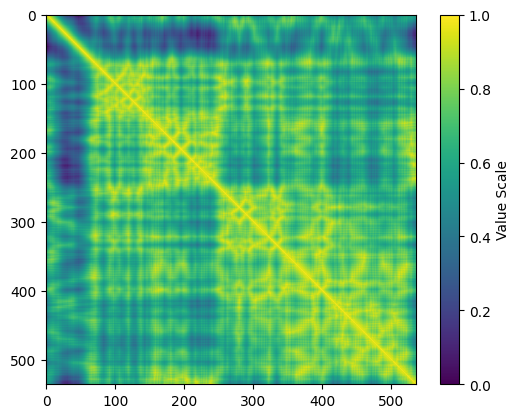

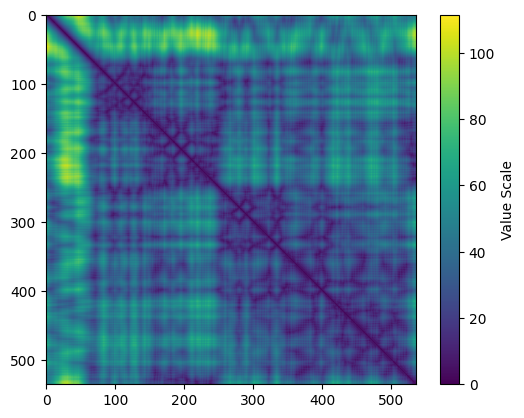

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(src_sc_org.numpy())
plt.colorbar(label="Value Scale")
plt.show()
plt.imshow(pdbs["SRC"].numpy())
plt.colorbar(label="Value Scale")
plt.show()

#### Compress whole pairrep to (200, 200) size

torch.Size([536, 65])
torch.Size([65, 65]) tensor([[0.9048, 0.7593, 0.5216,  ..., 0.5498, 0.5748, 0.5465],
        [0.7593, 0.9046, 0.7546,  ..., 0.5396, 0.5096, 0.4291],
        [0.5216, 0.7546, 0.9048,  ..., 0.4578, 0.3863, 0.2765],
        ...,
        [0.5498, 0.5396, 0.4578,  ..., 0.9405, 0.8657, 0.7532],
        [0.5748, 0.5096, 0.3863,  ..., 0.8657, 0.9233, 0.8427],
        [0.5465, 0.4291, 0.2765,  ..., 0.7532, 0.8427, 0.9285]],
       dtype=torch.float64)


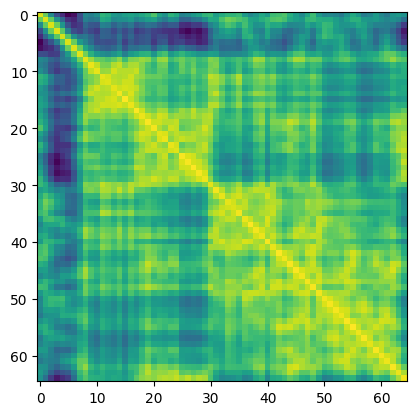

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

pool1 = nn.AdaptiveAvgPool1d(65)
pool2 = nn.AdaptiveAvgPool1d(65)
src_sc_org_1 = pool1(src_sc_org)
print(src_sc_org_1.shape)
src_sc_org_2 = pool2(src_sc_org_1.T)
print(src_sc_org_2.shape, src_sc_org_2)
plt.imshow(src_sc_org_2.numpy())

## Load amino acid sequences into sequences["SRC_sequence.txt]

In [ ]:
from google.colab import files

# Specify the local filepath of the file you want to upload
local_filepath = '/content/drive/MyDrive/GOF_Predictor/with_AlphaMissense/SRC_sequence.txt'


with open(local_filepath, 'r') as file:
    file_content = file.read()
sequences = {}
sequences["SRC_sequence.txt"] = file_content


## Load SRC MAVE as labels

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import torch

file_path = "/content/drive/MyDrive/GOF_Predictor/with_AlphaMissense/Src_MAVE_matrix.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)


print(df.shape)
# Convert DataFrame to a torch tensor
mave = torch.tensor(df.iloc[:, 1:].values, dtype=torch.float32)
print(mave.shape)

(250, 21)
torch.Size([250, 20])


#### after making Src_MAVE_matrix.csv new in the processing file: identify missing rows in the MAVE dataset and then add them manually to the csv in excel

In [ ]:
t = df.iloc[:, 0].tolist()
s = list(range(270, 536))
print(t)
print(s)
list1 = s
list2 = t

missing_in_list2 = [item for item in list1 if item not in list2]
missing_in_list1 = [item for item in list2 if item not in list1]

print("Missing in list2:", missing_in_list2)
print("Missing in list1:", missing_in_list1)

[270, 271, 272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282, 283, 284, 285, 286, 287, 288, 289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299, 300, 301, 302, 303, 304, 305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 346, 347, 348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 400, 401, 402, 403, 404, 405, 406, 407, 408, 409, 410, 411, 412, 413, 414, 415, 416, 417, 418, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440, 441, 442, 443, 444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 454, 455, 456, 457, 458, 459, 460, 461, 462, 463, 464, 465, 466, 467, 468, 469,

#### Min-Max Scale for Mave between 0 and 1 and visualise

In [ ]:
valid_values = mave[~torch.isnan(mave)]
min_val = valid_values.min()
max_val = valid_values.max()
print(valid_values.min() ,valid_values.max())

# scale lower part
below_zero_slope = 1 / - min_val
print(below_zero_slope)
mave = torch.where(mave < 0, below_zero_slope * mave, mave)
above_zero_slope = 1 / max_val
print(above_zero_slope)
mave = torch.where(mave > 0, above_zero_slope * mave, mave)


tensor(-2.0835) tensor(5.1250)
tensor(0.4800)
tensor(0.1951)


#### Visualise MAVE Matrix

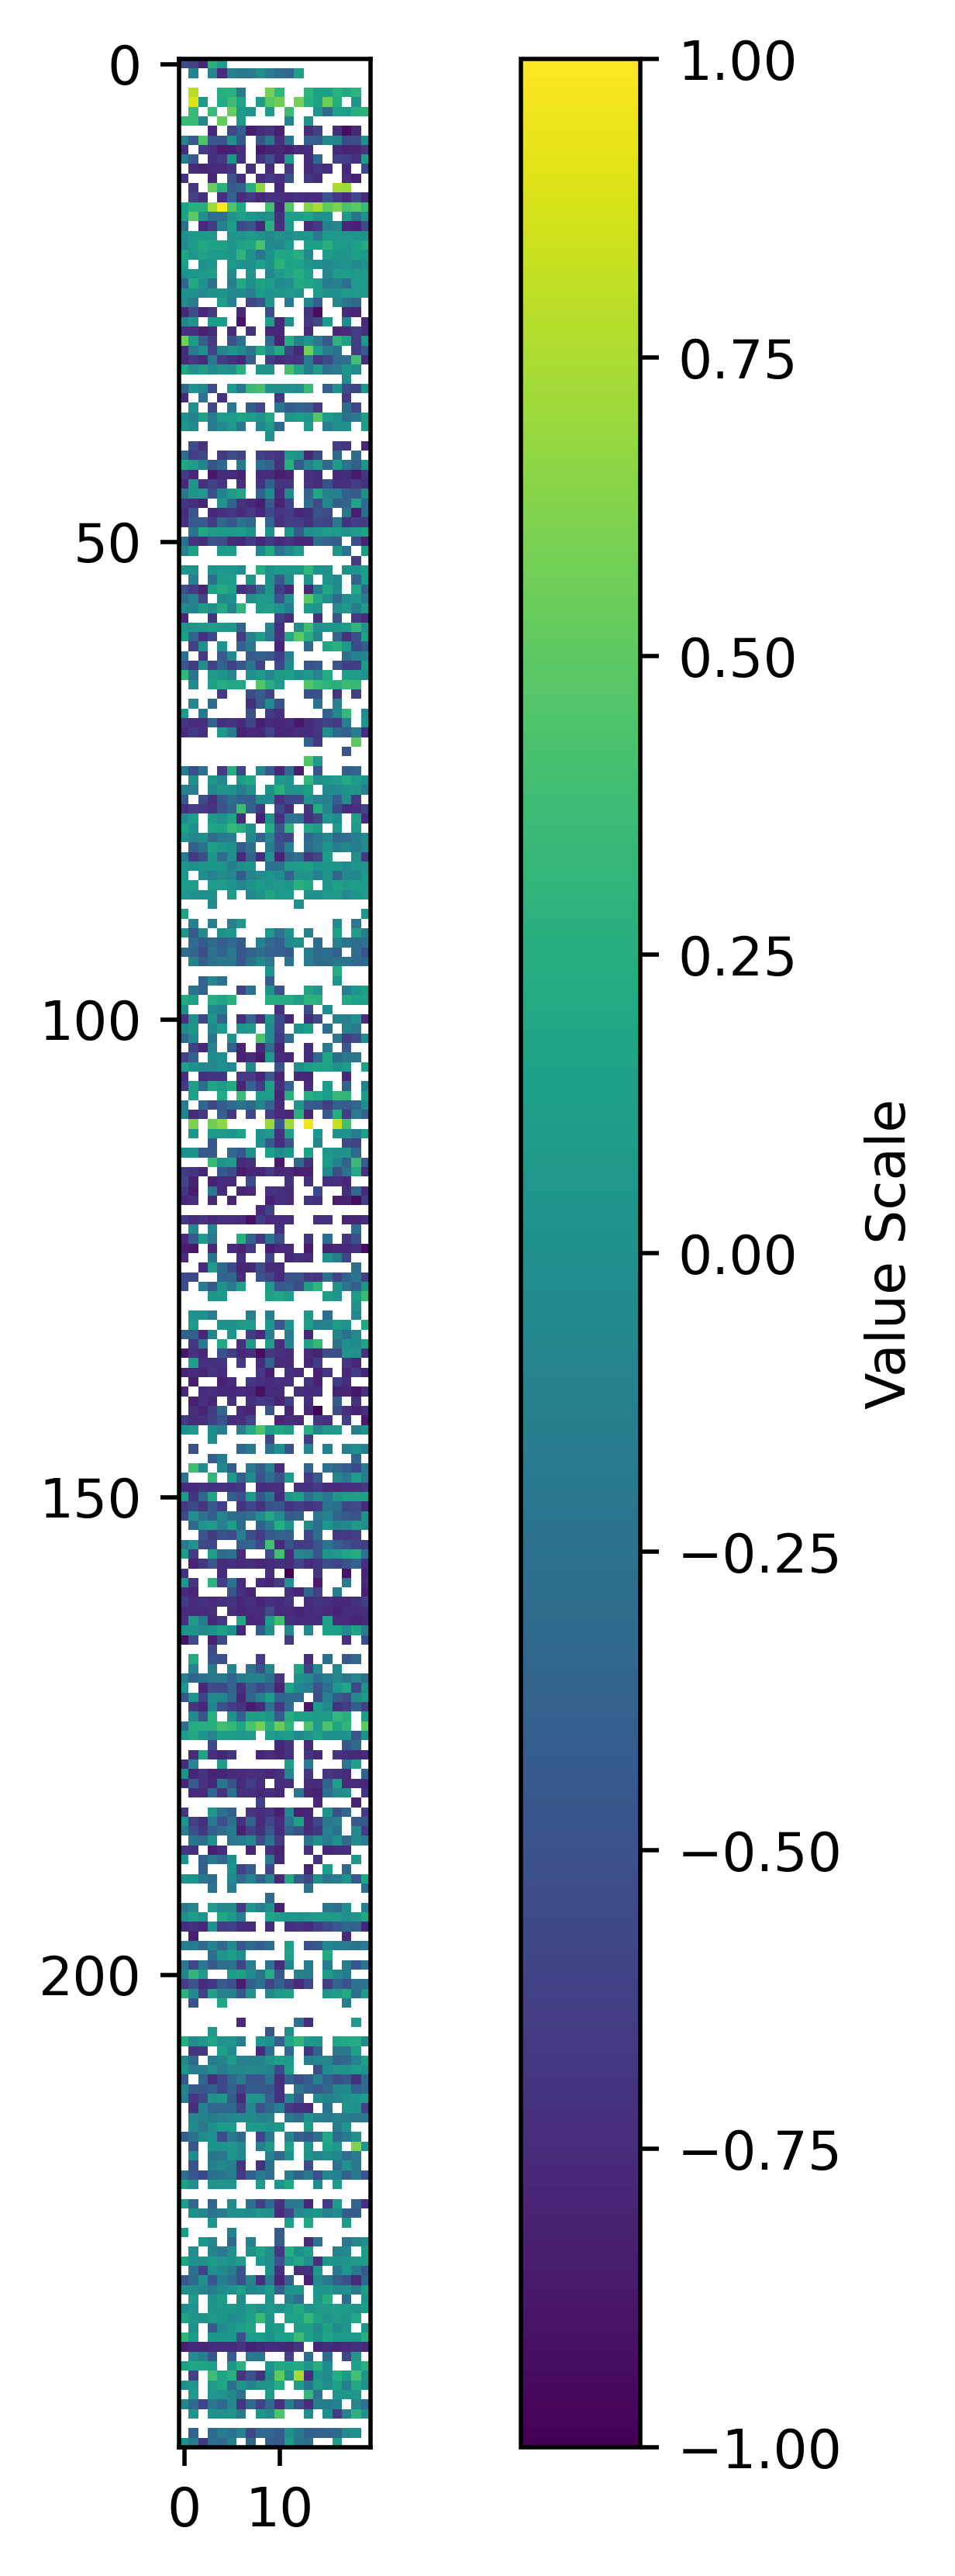

In [ ]:
plt.figure(figsize=(10, 8), dpi=500)
plt.imshow(mave.numpy())
plt.colorbar(label="Value Scale")
plt.show()

## Load AlphaMissense (am Tensor)
cave: manually added the first row to alphamissense Src_AM_matrix.csv

In [ ]:

file_name = "/content/drive/MyDrive/GOF_Predictor/with_AlphaMissense/Src_AM_matrix.csv"

# Read the CSV file into a pandas DataFrame
am_df = pd.read_csv(file_name)

am_df = am_df.drop(am_df.columns[0], axis=1)
am_df.head()

,F,G,E,V,T,A,D,Q,K,S,P,Y,W,R,N,C,M,L,I,H
0,0.2643,0.6517,0.9315,0.2124,0.7172,0.6332,0.9758,0.6561,0.7841,0.7231,0.7679,0.6899,0.6645,0.6958,0.8810,0.3478,NaN,0.2132,0.6864,0.8473
1,0.6895,NaN,0.7019,0.3905,0.3083,0.1766,0.6401,0.7221,0.8943,0.1783,0.6416,0.6561,0.7179,0.8133,0.4581,0.3331,0.6971,0.6165,0.5334,0.7454
2,0.1856,0.0549,0.6301,0.1365,0.0725,0.0644,0.5079,0.4358,0.7388,NaN,0.1339,0.2473,0.3986,0.7072,0.1047,0.0678,0.1951,0.1356,0.1535,0.3558
3,0.1811,0.0618,0.3839,0.0768,0.0493,0.0566,0.2465,0.1834,0.3802,0.0452,0.1046,0.1248,0.4228,0.3936,NaN,0.0655,0.1373,0.0859,0.0862,0.1060
4,0.8926,0.5415,0.7276,0.6357,0.5136,0.6065,0.8106,0.3707,NaN,0.7009,0.5913,0.7886,0.8820,0.0877,0.7746,0.7879,0.7308,0.6634,0.6918,0.5044


In [ ]:
am_df = am_df.where(am_df.notna(), 0, axis=0)
am = torch.tensor(am_df.values, dtype=torch.float32)
#am = am * -1 +1
am

tensor([[0.2643, 0.6517, 0.9315,  ..., 0.2132, 0.6864, 0.8473],
        [0.6895, 0.0000, 0.7019,  ..., 0.6165, 0.5334, 0.7454],
        [0.1856, 0.0549, 0.6301,  ..., 0.1356, 0.1535, 0.3558],
        ...,
        [0.9867, 0.7802, 0.0000,  ..., 0.9573, 0.9619, 0.9708],
        [0.8400, 0.6886, 0.8863,  ..., 0.6152, 0.4856, 0.5808],
        [0.4545, 0.8894, 0.8761,  ..., 0.0000, 0.1487, 0.8710]])

## Cut down Pair Rep and Sequence to the frame of the MAVE label data (270 - 519)

In [ ]:
start = df.iloc[0,0]
end = df.iloc[-1, 0]

print("start, end", start, end, end - start + 1)       # von 1 bis zur 3 (inkl. der 1) -> 3-1 = 2   ABER 1 2 und 3 sind 3 wenn inklusive
src_sc = src_sc_org[start-1:end, start-1:end]            # startet bei 0

am_short = am[start-1:end]

print("Src pairrep scaled: ", src_sc.shape, "Src Alphamissense cropped: ", am_short.shape)

seq = sequences["SRC_sequence.txt"][start-1:end]        # startet bei 0

print(len(seq))
print("mave shape: ", mave.shape)

start, end 270 519 250
Src pairrep scaled:  torch.Size([250, 250]) Src Alphamissense cropped:  torch.Size([250, 20])
250
mave shape:  torch.Size([250, 20])


ACHTUNG: bei Mave die fehlenden Zeilen fehlenden zeilen manuell eingefügt

## Encode sequence, train-validation split and Define get_batch_wei function (x, y, wei)

In [ ]:
#mave_seq_stoi = {val_a: seq_stoi[key_a] for key_a, val_a in mave_stoi.items()}

from collections import Counter
import torch
torch.manual_seed(42)

aas = df.columns.to_list()
aas = aas[1:]

mave_stoi = {ch: i for i, ch in enumerate(aas)}     # use mave amino acid - number of col dictionary for the encoding of the full aa sequence

encode = lambda s: [mave_stoi[c] for c in s] # encoder: take a string, output a list of integers

vocab_size = len(mave_stoi)

input_sequence_full = torch.tensor(encode(seq), dtype=torch.long)

input_sequence_full_org = torch.tensor(encode(sequences["SRC_sequence.txt"]), dtype=torch.long)

n = int(0.8*len(input_sequence_full)) # first 90% will be train, rest val
train_data = input_sequence_full#[:n]
src_sc_train = src_sc_org#[:n, :n]
mave_train = mave#[:n, :]

#val_data = input_sequence_full[n:]
#src_sc_val = src_sc[n:, n:]                            # WITHOUT VALIDATION
#mave_val = mave_sm[n:, :]


a, b = mave.shape

def get_batch_wei(split, batch_size, block_size, full=False):

    input_sequence = train_data if split == 'train' else val_data
    src_sc = src_sc_train if split == 'train' else src_sc_val
    label = mave_train if split == "train" else mave_val




    while True:
        x = torch.randint(low=int(block_size // 2), high=int(len(mave_train) - (block_size // 2)), size=(batch_size,))
        y_i = torch.randint(b, (batch_size,))
        if not torch.isnan(mave[x, y_i]).any():                                         # tensor indexing begins at zero too
            break

    y = mave[x, y_i].to(torch.float32)

    ref = torch.stack([input_sequence[i:i+block_size] for i in (x - (block_size // 2))])    # for odd numbers (e.g. block_size 51) this generates the right val for tensor indexing (-1 for begin at zero)

    am = torch.stack([am_short[i:i+block_size] for i in (x - (block_size // 2))]).to(torch.float32)


    pairrep = torch.stack([src_sc[i:i+block_size, i:i+block_size] for i in (x - (block_size // 2))]).to(torch.float32)
    #print("x", x, "\n y_i", y_i)
    mut = ref.clone()
    mut[:, (block_size // 2)] = y_i


    if full:
        pairrep_full = src_sc_org_2.float()
        seq_full = input_sequence_full_org
        am_full = am
        return ref, mut, y, pairrep, pairrep_full, seq_full, am, am_full
    else:
        return ref, mut, y, pairrep, am


batch_size = 4
block_size = 51
ref, mut, y, pairrep, am = get_batch_wei("train", batch_size, block_size)
print(mave_stoi)
print("ref: ", ref.shape, "mut: ", mut.shape, "y: ", y.shape, "pairrep: ", pairrep.shape, "am: ", am.shape)
#print(ref, mut, y, pairrep)


{'F': 0, 'G': 1, 'E': 2, 'V': 3, 'T': 4, 'A': 5, 'D': 6, 'Q': 7, 'K': 8, 'S': 9, 'P': 10, 'Y': 11, 'W': 12, 'R': 13, 'N': 14, 'C': 15, 'M': 16, 'L': 17, 'I': 18, 'H': 19}
ref:  torch.Size([4, 51]) mut:  torch.Size([4, 51]) y:  torch.Size([4]) pairrep:  torch.Size([4, 51, 51]) am:  torch.Size([4, 51, 20])


### Validieren des Indexing

mut
- 42 ist der erste index von x im mave tensor (tensor indexing ab 0, range aus der 42 kommt beginnt auch bei 0) -> also aa position (zählt ab 1) ist 43
- zeile im src_mave_matrix.xlsx beginnt ab 2 -> also 43 + 1 -> ist Zeile 44, die zeigt gesamt aa position im protein (mave nur auschnitt) ist 312
- nachschauen im src_mave_pandas_df_processed xlsx wo auch die wt und mt AAs stehen: Gln312 (Q Glutamin)
- Q wird von mave_stoi mit 7 encodiert, also sollte bei der ref sequenz eine 7 in der mitte (position 26) stehen

mt
- austausch durch zahlen von y -> sind für lookup aus mave für das label activity score da und für den austausch von wt_res aus ref zu mt_res in die mut sequenz
- erste zahl ist 6, wird einfach bei ref für mut umgetauscht ist richtig
- 6 indexed in mave (beginnt ab 0), also ab 1 gezählt die 7. spalte in src_mave_matrix xlsx, dort steht -0.414
- checken mit selbem indexing in einen nicht min-max-gescalten mave tensor für den direkten vergleich zum excel sheet zeigt, wo im min-max-gescalten tensor 0.23 steht, ist sonst -0.414 also richtig

In [ ]:
c = pd.read_csv("/Users/creator/Documents/Research/Bioinformatics/GOF_Predictor/Transformer_Approach/SRC/data_files_processed/Src_MAVE_matrix.csv")
print(df.shape)
# Convert DataFrame to a torch tensor
c = torch.tensor(c.iloc[:, 1:].values, dtype=torch.float32)
print(c[42, 6], mave[42, 6])

(250, 21)
tensor(-0.4141) tensor(0.2316)


# Build the model

### Model with 1 Linear layer for going down to 1 dim

In [ ]:

# Ensure all tensor operations use float32 explicitly
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(42)



class FeedForwardLayer(nn.Module):
    def __init__(self, hidden_dim, dropout):
        super(FeedForwardLayer, self).__init__()
        self.fc_1 = nn.Linear(hidden_dim, hidden_dim * 4)
        self.fc_2 = nn.Linear(hidden_dim * 4, hidden_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = F.relu(self.fc_1(x))
        x = self.fc_2(x)
        x = self.dropout(x)
        return x


class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout):
        super(MultiHeadAttentionLayer, self).__init__()
        assert hidden_dim % num_heads == 0
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads

        self.fc_q_ref = nn.Linear(hidden_dim, hidden_dim)
        self.fc_k_ref = nn.Linear(hidden_dim, hidden_dim)
        self.fc_v_mut = nn.Linear(hidden_dim, hidden_dim)        # to enable matmul with wei (which is blocksize/Input_DIM, INPUT_DIM (quadratic))

        self.fc_o = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim]))

    def forward(self, ref, mut, pairrep):

        _, _, C = ref.shape

        q_ref = self.fc_q_ref(ref)
        k_ref = self.fc_k_ref(ref)

        attention = q_ref @ k_ref.transpose(-2,-1) * C**-0.5

        attention += pairrep        # ist schon min-max gescalet (-1 <--> +1)

        wei = self.dropout(F.softmax(attention, dim=-1))

        v_mut = self.fc_v_mut(mut)

        out = self.fc_o(wei @ v_mut)

        return out, attention








class TransformerDecoderLayer(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout):
        super(TransformerDecoderLayer, self).__init__()
        self.sa_layer_norm_in_ref = nn.LayerNorm(hidden_dim)
        self.sa_layer_norm_in_mut = nn.LayerNorm(hidden_dim)
        self.sa_layer_norm_out = nn.LayerNorm(hidden_dim)
        self.self_attention = MultiHeadAttentionLayer(hidden_dim, num_heads, dropout)
        self.after_feedforward_layer_norm = nn.LayerNorm(hidden_dim)
        self.feedforward = FeedForwardLayer(hidden_dim, dropout)
        self.dropout_att = nn.Dropout(dropout)
        self.dropout_ffw = nn.Dropout(dropout)


    def forward(self, ref, mut, pairrep):
        out, attention = self.self_attention(self.sa_layer_norm_in_ref(ref), self.sa_layer_norm_in_mut(mut), pairrep)
        out_alt = ref + self.dropout_att(out)
        out = self.sa_layer_norm_out(out)


        out = self.feedforward(out)
        out = out_alt + self.dropout_ffw(out)
        out = self.after_feedforward_layer_norm(out)

        return out, attention












class TransformerDecoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, num_layers, num_heads, dropout):
        super(TransformerDecoder, self).__init__()
        self.embedding_ref = nn.Embedding(input_dim, hidden_dim)
        self.embedding_mut = nn.Embedding(input_dim, hidden_dim)
        self.layers = nn.ModuleList([TransformerDecoderLayer(hidden_dim, num_heads, dropout) for _ in range(num_layers)])

        self.fc_o = nn.Linear(hidden_dim, output_dim)


    def forward(self, ref, mut, pairrep):

        ref = self.embedding_ref(ref)
        mut = self.embedding_mut(mut)

        for layer in self.layers:
            out, attention = layer(ref, mut, pairrep)



        output = self.fc_o(out)

        return output, attention









class Transformer(nn.Module):
    def __init__(self, decoder):
        super(Transformer, self).__init__()
        self.decoder = decoder


    def forward(self, ref, mut, y, pairrep):

        ####### Pass in, Get output ####################
        out, attention = self.decoder(ref, mut, pairrep)

        out = out[:, (block_size // 2), :].squeeze()
        out = F.softmax(out)


        ##### Get Loss ###################
        loss = torch.sum(torch.abs(out - y)) / len(y)

        return out, loss, attention


In [ ]:
batch_size = 4
block_size = 65
input_dim = block_size
hidden_dim = block_size     #because we need to add the pairrep (block_size, block_size) on the attention matrix (hidden_dim, hidden_dim)
output_dim = 1              # get one prediction, perhaps a bit drastic downsizing for neurons, from 45 to 1, maybe make MLP
num_layers = 5
num_heads = 1               # must satisfy condition: block_size // num_heads   (kein Rest erlaubt!, muss glatt aufgehen)
dropout = 0.2
learning_rate = 1e-3
epochs = 3000



decoder = TransformerDecoder(output_dim, hidden_dim, num_layers, num_heads, dropout)

model = Transformer(decoder)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


train_losses = []
train_steps = []


# Training Loop
for epoch in range(epochs):

    ref, mut, y, pairrep = get_batch_wei("train", batch_size, block_size)


    output, loss, _ = model(ref, mut, y, pairrep)
    train_losses.append(loss.detach())
    train_steps.append(epoch)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# lowest random loss was 0.04

ValueError: too many values to unpack (expected 4)

In [ ]:
import statistics

# Assuming train_losses is a Python list
print(f"Median of the first 200 train losses: {statistics.median(train_losses[:400])}")
print(f"Median of the last 200 train losses: {statistics.median(train_losses[-400:])}")


Median of the first 200 train losses: 0.1096605733036995
Median of the last 200 train losses: 0.09713613986968994


Median of the first 200 train losses: 0.1096605733036995
Median of the last 200 train losses: 0.09713613986968994
last train loss: 0.14903494715690613


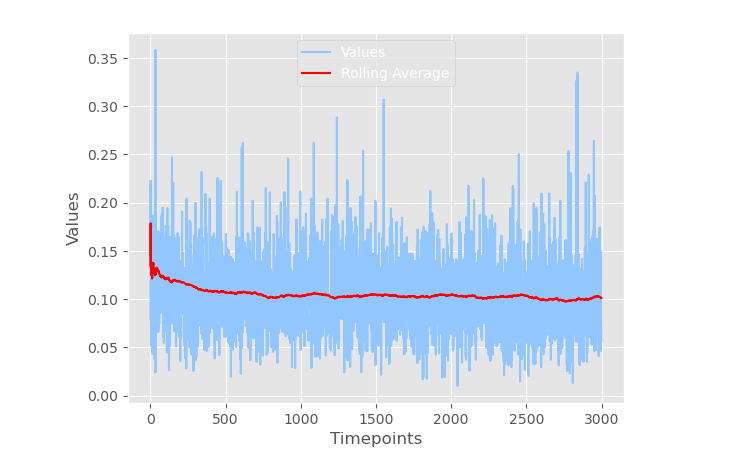

In [ ]:
import statistics

print(f"Median of the first 200 train losses: {statistics.median(train_losses[:400])}")
print(f"Median of the last 200 train losses: {statistics.median(train_losses[-400:])}")
print(f"last train loss: {train_losses[-1]}")


plt.style.use('seaborn-v0_8-pastel')
# Convert lists to a Pandas DataFrame
data = pd.DataFrame({'Timepoints': train_steps, 'Values': train_losses})

# Calculate the rolling average including the very first value
rolling_avg_window = 300  # Adjust window size as needed
rolling_avg = data['Values'].rolling(window=rolling_avg_window, min_periods=1).mean()

# Create the plot
plt.plot(data['Timepoints'], data['Values'], label='Values')
plt.plot(data['Timepoints'], rolling_avg, color='r', label='Rolling Average')  # Plot the rolling average
plt.xlabel('Timepoints')
plt.ylabel('Values')
plt.legend()
plt.title('Plot of Timepoints and Values with Rolling Average (Including First Value)')
plt.grid(True)

# Show the plot
plt.show()

### Model with MLP for going down to 1 dim, learnable param for adding pairrep disabled

In [ ]:

# Ensure all tensor operations use float32 explicitly
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(42)



class FeedForwardLayer(nn.Module):
    def __init__(self, hidden_dim, dropout):
        super(FeedForwardLayer, self).__init__()
        self.fc_1 = nn.Linear(hidden_dim, hidden_dim * 4)
        self.fc_2 = nn.Linear(hidden_dim * 4, hidden_dim)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = F.relu(self.fc_1(x))
        x = self.fc_2(x)
        x = self.dropout(x)
        return x


class Steroformer(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout):
        super(Steroformer, self).__init__()
        assert hidden_dim % num_heads == 0
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads

        self.fc_q_ref = nn.Linear(hidden_dim, hidden_dim)
        self.fc_k_ref = nn.Linear(hidden_dim, hidden_dim)
        self.fc_v_mut = nn.Linear(hidden_dim, hidden_dim)        # to enable matmul with wei (which is blocksize/Input_DIM, INPUT_DIM (quadratic))

        self.fc_o = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim]))

        self.p_pairrep = nn.Parameter(torch.randn(1))

    def forward(self, ref, mut, pairrep, src_sc_full, ref_full):

        _, _, C = ref.shape

        q_ref = self.fc_q_ref(ref)
        k_ref = self.fc_k_ref(ref)

        attention = q_ref @ k_ref.transpose(-2,-1) * C**-0.5

        attention += pairrep # * self.p_pairrep        # ist schon min-max gescalet (-1 <--> +1)

        wei = self.dropout(F.softmax(attention, dim=-1))

        v_mut = self.fc_v_mut(mut)

        out = self.fc_o(wei @ v_mut)

        return out, attention








class TransformerDecoderLayer(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout):
        super(TransformerDecoderLayer, self).__init__()
        self.sa_layer_norm_in_ref = nn.LayerNorm(hidden_dim)
        self.sa_layer_norm_in_mut = nn.LayerNorm(hidden_dim)
        self.sa_layer_norm_out = nn.LayerNorm(hidden_dim)
        self.steroformer = Steroformer(hidden_dim, num_heads, dropout)
        self.after_feedforward_layer_norm = nn.LayerNorm(hidden_dim)
        self.feedforward = FeedForwardLayer(hidden_dim, dropout)
        self.dropout_att = nn.Dropout(dropout)
        self.dropout_ffw = nn.Dropout(dropout)


    def forward(self, ref, mut, pairrep, src_sc_full, ref_full):
        out, attention = self.steroformer(self.sa_layer_norm_in_ref(ref), self.sa_layer_norm_in_mut(mut), pairrep, src_sc_full, ref_full)
        out_alt = ref + self.dropout_att(out)
        out = self.sa_layer_norm_out(out)


        out = self.feedforward(out)
        out = out_alt + self.dropout_ffw(out)
        out = self.after_feedforward_layer_norm(out)

        return out, attention












class TransformerDecoder(nn.Module):
    def __init__(self, output_dim, hidden_dim, num_layers, num_heads, dropout):
        super(TransformerDecoder, self).__init__()
        self.embedding_ref = nn.Embedding(input_dim, hidden_dim)
        self.embedding_ref_full = nn.Embedding(seq_full_dim, hidden_dim)
        self.embedding_mut = nn.Embedding(input_dim, hidden_dim)

        self.pool_seq_full_org = nn.AdaptiveAvgPool1d(input_dim)

        self.layers = nn.ModuleList([TransformerDecoderLayer(hidden_dim, num_heads, dropout) for _ in range(num_layers)])

        self.fc_1 = nn.Linear(hidden_dim, hidden_dim //2)
        self.fc_2 = nn.Linear(hidden_dim //2, hidden_dim //8)
        self.fc_3 = nn.Linear(hidden_dim //8, output_dim)


    def forward(self, ref, mut, pairrep, src_sc_full, seq_full):

        ref_full = self.embedding_ref_full(seq_full)
        ref_full = self.pool_seq_full_org(ref_full.T)

        ref = self.embedding_ref(ref)
        mut = self.embedding_mut(mut)

        for layer in self.layers:
            out, attention = layer(ref, mut, pairrep, src_sc_full, ref_full)

        out = F.relu(self.fc_1(out))
        out = F.relu(self.fc_2(out))
        output = self.fc_3(out)

        return output, attention









class Transformer(nn.Module):
    def __init__(self, decoder):
        super(Transformer, self).__init__()
        self.decoder = decoder


    def forward(self, ref, mut, y, pairrep, src_sc_full, seq_full):

        ####### Pass in, Get output ####################
        out, attention = self.decoder(ref, mut, pairrep, src_sc_full, seq_full)

        out = out[:, (block_size // 2), :].squeeze()
        out = F.softmax(out)


        ##### Get Loss ###################
        loss = torch.sum(torch.abs(out - y)) / len(y)

        return out, loss, attention


In [ ]:
batch_size = 4
block_size = 65
input_dim = block_size
seq_full_dim = len(src_sc_full)
hidden_dim = block_size     #because we need to add the pairrep (block_size, block_size) on the attention matrix (hidden_dim, hidden_dim)
output_dim = 1              # get one prediction, perhaps a bit drastic downsizing for neurons, from 45 to 1, maybe make MLP
num_layers = 5
num_heads = 1               # must satisfy condition: block_size // num_heads   (kein Rest erlaubt!, muss glatt aufgehen)
dropout = 0.2
learning_rate = 1e-3
epochs = 3000



decoder = TransformerDecoder(output_dim, hidden_dim, num_layers, num_heads, dropout)

model = Transformer(decoder)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


train_losses = []
train_steps = []


# Training Loop
for epoch in range(epochs):

    ref, mut, y, pairrep, src_sc_full, seq_full = get_batch_wei("train", batch_size, block_size)


    output, loss, _ = model(ref, mut, y, pairrep, src_sc_full, seq_full)
    train_losses.append(loss.detach())
    train_steps.append(epoch)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()

# lowest random loss was 0.04

Median of the first 200 train losses:  0.10065
Median of the last 200 train losses:  0.09980
last train loss:  0.09412


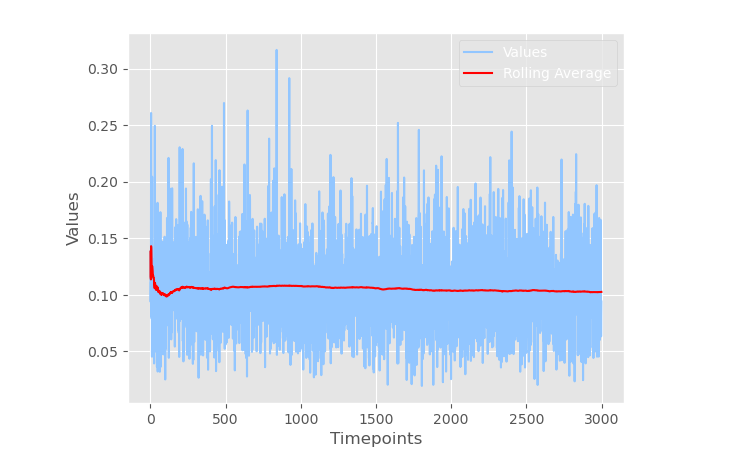

In [ ]:
import statistics

print(f"Median of the first 200 train losses: {statistics.median(train_losses[:400]): .5f}")
print(f"Median of the last 200 train losses: {statistics.median(train_losses[-400:]): .5f}")
print(f"last train loss: {train_losses[-1]: .5f}")

plt.style.use('seaborn-v0_8-pastel')
# Convert lists to a Pandas DataFrame
data = pd.DataFrame({'Timepoints': train_steps, 'Values': train_losses})

# Calculate the rolling average including the very first value
rolling_avg_window = 1000  # Adjust window size as needed
rolling_avg = data['Values'].rolling(window=rolling_avg_window, min_periods=1).mean()

# Create the plot
plt.plot(data['Timepoints'], data['Values'], label='Values')
plt.plot(data['Timepoints'], rolling_avg, color='r', label='Rolling Average')  # Plot the rolling average
plt.xlabel('Timepoints')
plt.ylabel('Values')
plt.legend()
plt.title('Plot of Timepoints and Values with Rolling Average (Including First Value)')
plt.grid(True)

# Show the plot
plt.show()

### Results

with mlp
- Median of the first 200 train losses: 0.10340134054422379
- Median of the last 200 train losses: 0.09901847690343857        (difference: 0.0044)
- last train loss: 0.108225017786026

with mlp and with same embedding for ref and mut
- Median of the first 200 train losses: 0.10241115093231201
- Median of the last 200 train losses: 0.10255053639411926
- last train loss: 0.0787394717335701

with mlp, without same embedding but with learnable parameter for pairrep
- Median of the first 200 train losses:  0.10065
- Median of the last 200 train losses:  0.09980
- last train loss:  0.09412



weitere Ideen
- um den mutierten residue herum nicht die residues haben, die in der sequenz davor liegen, sondern die block_size residues, die am nächsten dran sind


new approach: steroformer for ref and mut separated then subtracting ref and mut, then as before
- Median of the first 200 train losses:  0.09977
- Median of the last 200 train losses:  0.08717
- last train loss:  0.07858

### Best Model

### Best Model

In [213]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
torch.manual_seed(42)


class MultiHeadAttentionLayer(nn.Module):
    def __init__(self, hidden_dim, num_heads, dropout):
        super(MultiHeadAttentionLayer, self).__init__()
        assert hidden_dim % num_heads == 0
        self.hidden_dim = hidden_dim
        self.num_heads = num_heads
        self.head_dim = hidden_dim // num_heads

        self.fc_q = nn.Linear(hidden_dim, hidden_dim)
        self.fc_k = nn.Linear(hidden_dim, hidden_dim)
        self.fc_v = nn.Linear(hidden_dim, hidden_dim)

        self.fc_o = nn.Linear(hidden_dim, hidden_dim)
        self.dropout = nn.Dropout(dropout)
        self.scale = torch.sqrt(torch.FloatTensor([self.head_dim]))

    def forward(self, query, key, value):
        batch_size = query.shape[0]
        Q = self.fc_q(query)
        K = self.fc_k(key)
        V = self.fc_v(value)

        Q = Q.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        K = K.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)
        V = V.view(batch_size, -1, self.num_heads, self.head_dim).permute(0, 2, 1, 3)

        energy = torch.matmul(Q, K.permute(0, 1, 3, 2)) / self.scale

        attention = torch.softmax(energy, dim=-1)

        x = torch.matmul(self.dropout(attention), V)
        x = x.permute(0, 2, 1, 3).contiguous().view(batch_size, -1, self.hidden_dim)

        x = self.fc_o(x)

        return x, attention





class Position_Encoder(nn.Module):
    def __init__(self, hidden_dim, input_dim):
        super(Position_Encoder, self).__init__()

        self.ref_value = nn.Linear(hidden_dim, hidden_dim)
        self.layer_norm = nn.LayerNorm(hidden_dim)

    def forward(self, ref_embedded, pairrep):


        ref_value = self.ref_value(ref_embedded)


        ref_out = self.layer_norm(pairrep @ ref_value)

        return ref_out



class CNN(nn.Module):
  def __init__(self, block_size, hidden_dim):       # block_size = input_dim
    super(CNN, self).__init__()
    self.conv = nn.Conv1d(in_channels=block_size, out_channels=1, kernel_size=1)
    self.pool = nn.AvgPool1d(kernel_size=(20))  # Pool across time steps

  def forward(self, x):
    x = self.conv(x)

    x = self.pool(x)
    return x




class TransformerDecoder(nn.Module):
    def __init__(self, output_dim, hidden_dim,input_dim,  init_embedding_dim, num_layers, num_heads, dropout, aa_num):
        super(TransformerDecoder, self).__init__()

        self.embedding = nn.Embedding(input_dim, hidden_dim)

        self.pos_encoder = Position_Encoder(hidden_dim, hidden_dim)

        self.multihead = MultiHeadAttentionLayer(hidden_dim, num_heads, dropout)

        self.fc_am = nn.Linear(aa_num, aa_num)

        self.compress_ref = CNN(input_dim, hidden_dim)
        self.compress_mut = CNN(input_dim, hidden_dim)

        self.fc_o = nn.Linear(aa_num, output_dim)


    def forward(self, ref, mut, pairrep, am):

        ref_embedded = self.embedding(ref)    # -2 - 1.9
        mut_embedded = self.embedding(mut)


        ref_positional = (self.pos_encoder(ref_embedded, pairrep) + ref_embedded) / 2
            # => average pool etc. to get 1 score, that is the wildtype functional activity = 1, that gets divided by the mut activity to produce a relative score from -1 to 1 (subtract 1.5/1 -1)

        ref_final = self.compress_ref(ref_positional).squeeze(2, 1)


        mut = (ref_positional + mut_embedded) / 2


        mut[:, 32, :] =  mut_embedded[:, 32, :]
        mut, _ = self.multihead(mut, mut, mut)

        mut = self.compress_mut(mut_embedded).squeeze(2, 1)



        print(mut, ref_final)

        score = (mut - ref_final)

        print(score)
        return score









class Transformer(nn.Module):
    def __init__(self, decoder):
        super(Transformer, self).__init__()
        self.decoder = decoder

        #ref, mut, y, pairrep, src_sc_full, seq_full, am
    def forward(self, ref, mut, y, pairrep, am):

        ####### Pass in, Get output ####################
        score = self.decoder(ref, mut, pairrep, am)


        ##### Get Loss ###################
        loss = torch.sum(torch.abs(score.squeeze() - y)) / len(y)

        return score, loss

In [214]:

batch_size = 4
block_size = 65
aa_num = 20
input_dim = block_size
seq_full_dim = len(input_sequence_full)
hidden_dim = 30     #because we need to add the pairrep (block_size, block_size) on the attention matrix (hidden_dim, hidden_dim)
output_dim = 1              # get one prediction, perhaps a bit drastic downsizing for neurons, from 45 to 1, maybe make MLP
num_layers = 5
num_heads = 1               # must satisfy condition: block_size // num_heads   (kein Rest erlaubt!, muss glatt aufgehen)
dropout = 0.2
learning_rate = 1e-3
epochs = 6000
init_embedding_dim = 2


decoder = TransformerDecoder(output_dim, hidden_dim, input_dim, init_embedding_dim, num_layers, num_heads, dropout, aa_num)

model = Transformer(decoder)

optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)


train_losses = []
train_steps = []


# Training Loop
for epoch in range(epochs):

    print(epoch if epoch % 100 == 0 else '', end='\n' if epoch % 100 == 0 else '')
    ref, mut, y, pairrep, am = get_batch_wei("train", batch_size, block_size, full=False)     # with red, no src pairrep full, and no sequence full


    output, loss = model(ref, mut, y, pairrep, am)
    train_losses.append(loss.detach())
    train_steps.append(epoch)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


Streaming output truncated to the last 5000 lines.
tensor([ 0.3837, -0.1512,  0.0820,  0.0060], grad_fn=<SqueezeBackward2>) tensor([0.2470, 0.1290, 0.1960, 0.2867], grad_fn=<SqueezeBackward2>)
tensor([ 0.1366, -0.2802, -0.1141, -0.2807], grad_fn=<SubBackward0>)
tensor([ 0.0074, -0.3394,  0.1198,  0.0227], grad_fn=<SqueezeBackward2>) tensor([0.4533, 0.5496, 0.3182, 0.1207], grad_fn=<SqueezeBackward2>)
tensor([-0.4459, -0.8890, -0.1984, -0.0981], grad_fn=<SubBackward0>)
tensor([ 0.0800, -0.1631,  0.3930, -0.2477], grad_fn=<SqueezeBackward2>) tensor([0.4728, 0.3296, 0.2520, 0.1865], grad_fn=<SqueezeBackward2>)
tensor([-0.3929, -0.4927,  0.1410, -0.4343], grad_fn=<SubBackward0>)
tensor([ 0.0153, -0.0046,  0.1155,  0.1122], grad_fn=<SqueezeBackward2>) tensor([0.1405, 0.4087, 0.2065, 0.1464], grad_fn=<SqueezeBackward2>)
tensor([-0.1252, -0.4133, -0.0910, -0.0343], grad_fn=<SubBackward0>)
tensor([-0.0592,  0.0071,  0.0457, -0.2042], grad_fn=<SqueezeBackward2>) tensor([0.1119, 0.2828, 0.3125, 

Median of the first 400 train losses:  0.27581
Median of the last 400 train losses:  0.19800
last train loss:  0.18816


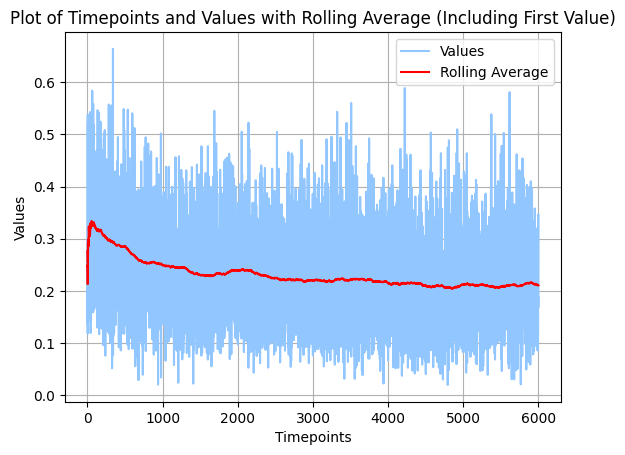

In [217]:

# lowest random loss was 0.04
import statistics

print(f"Median of the first 400 train losses: {statistics.median(train_losses[:400]): .5f}")
print(f"Median of the last 400 train losses: {statistics.median(train_losses[-400:]): .5f}")
print(f"last train loss: {train_losses[-1]: .5f}")

plt.style.use('seaborn-v0_8-pastel')
# Convert lists to a Pandas DataFrame
data = pd.DataFrame({'Timepoints': train_steps, 'Values': train_losses})

# Calculate the rolling average including the very first value
rolling_avg_window = 500
rolling_avg = data['Values'].rolling(window=rolling_avg_window, min_periods=1).mean()

# Create the plot
plt.plot(data['Timepoints'], data['Values'], label='Values')
plt.plot(data['Timepoints'], rolling_avg, color='r', label='Rolling Average')  # Plot the rolling average
plt.xlabel('Timepoints')
plt.ylabel('Values')
plt.legend()
plt.title('Plot of Timepoints and Values with Rolling Average (Including First Value)')
plt.grid(True)

# Show the plot
plt.show()